# Step 1: Importing the reqiured libraries

In [526]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib.gridspec as gridspec

# Step 2: Load the CSV Files into DataFrames

In [5]:
accounts = pd.read_csv('Data/accounts.csv')
departments = pd.read_csv('Data/departments.csv')
vendors_customers = pd.read_csv('Data/vendors_customers.csv')
dates = pd.read_csv('Data/dates.csv')
general_ledger = pd.read_csv('Data/general_ledger.csv')

# Step 3: Understand the Dataset Structure

## Checking structure and summary statistics of each dimension table

In [7]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AccountID    10 non-null     int64 
 1   AccountName  10 non-null     object
 2   AccountType  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [8]:
accounts.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,10.0,1005.5,3.02765,1001.0,1003.25,1005.5,1007.75,1010.0


In [9]:
accounts.head(15)

,AccountID,AccountName,AccountType
0,1001,Cash,Asset
1,1002,Accounts Receivable,Asset
2,1003,Inventory,Asset
3,1004,Office Equipment,Asset
4,1005,Accounts Payable,Liability
5,1006,Long-Term Debt,Liability
6,1007,Common Stock,Equity
7,1008,Revenue,Revenue
8,1009,Cost of Goods Sold,Expense
9,1010,Operating Expenses,Expense


In [10]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DepartmentID    3 non-null      int64 
 1   DepartmentName  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [11]:
departments.describe().T

,count,mean,std,min,25%,50%,75%,max
DepartmentID,3.0,2.0,1.0,1.0,1.5,2.0,2.5,3.0


In [12]:
departments

,DepartmentID,DepartmentName
0,1,Sales
1,2,Operations
2,3,Administration


In [13]:
vendors_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PartyID    4 non-null      int64 
 1   PartyName  4 non-null      object
 2   PartyType  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes


In [14]:
vendors_customers.describe().round().T

,count,mean,std,min,25%,50%,75%,max
PartyID,4.0,202.0,1.0,201.0,202.0,202.0,203.0,204.0


In [15]:
vendors_customers

,PartyID,PartyName,PartyType
0,201,ABC Supplies,Vendor
1,202,XYZ Retail,Customer
2,203,Global Tech,Customer
3,204,FastMart,Vendor


In [16]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DateID   365 non-null    object
 1   Year     365 non-null    int64 
 2   Month    365 non-null    int64 
 3   Day      365 non-null    int64 
 4   Quarter  365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [17]:
dates.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Year,365.0,2023.0,0.0,2023.0,2023.0,2023.0,2023.0,2023.0
Month,365.0,7.0,3.0,1.0,4.0,7.0,10.0,12.0
Day,365.0,16.0,9.0,1.0,8.0,16.0,23.0,31.0
Quarter,365.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0


In [18]:
dates

,DateID,Year,Month,Day,Quarter
0,2023-01-01,2023,1,1,1
1,2023-01-02,2023,1,2,1
2,2023-01-03,2023,1,3,1
3,2023-01-04,2023,1,4,1
4,2023-01-05,2023,1,5,1
...,...,...,...,...,...
360,2023-12-27,2023,12,27,4
361,2023-12-28,2023,12,28,4
362,2023-12-29,2023,12,29,4
363,2023-12-30,2023,12,30,4


### Convert 'DateID' column to datetime format

In [19]:
dates['DateID'] = pd.to_datetime(dates['DateID'])

In [20]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DateID   365 non-null    datetime64[ns]
 1   Year     365 non-null    int64         
 2   Month    365 non-null    int64         
 3   Day      365 non-null    int64         
 4   Quarter  365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


### Review general_ledger table's structure and summary

In [21]:
general_ledger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EntryID       400 non-null    object 
 1   Date          400 non-null    object 
 2   AccountID     400 non-null    int64  
 3   DepartmentID  400 non-null    int64  
 4   PartyID       390 non-null    float64
 5   Amount        400 non-null    float64
 6   Type          400 non-null    object 
 7   Description   390 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 25.1+ KB


In [22]:
general_ledger.describe().round().T

,count,mean,std,min,25%,50%,75%,max
AccountID,400.0,1006.0,3.0,1001.0,1003.0,1006.0,1008.0,1010.0
DepartmentID,400.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0
PartyID,390.0,203.0,1.0,201.0,202.0,203.0,204.0,204.0
Amount,400.0,4992.0,2908.0,150.0,2489.0,5166.0,7500.0,9906.0


In [23]:
general_ledger

,EntryID,Date,AccountID,DepartmentID,PartyID,Amount,Type,Description
0,GL0001,2023-11-24,1002,1,203.0,3807.95,Debit,Customer payment
1,GL0002,2023-03-13,1002,3,201.0,9512.07,Credit,Office supplies purchase
2,GL0003,2023-01-16,1002,1,202.0,7346.74,Debit,Software license
3,GL0004,2023-04-12,1009,2,202.0,6026.72,Credit,Software license
4,GL0005,2023-05-23,1001,1,204.0,1644.58,Credit,Equipment maintenance
...,...,...,...,...,...,...,...,...
395,GL0396,2023-06-17,1009,2,201.0,9314.50,Debit,Service revenue
396,GL0397,2023-10-26,1008,1,204.0,8598.29,Debit,Inventory restock
397,GL0398,2023-03-09,1009,2,204.0,4347.04,Debit,Software license
398,GL0399,2023-08-25,1005,3,201.0,7533.62,Credit,Equipment maintenance


### Convert 'Date' column in general_ledger to datetime format

In [24]:
general_ledger['Date'] = pd.to_datetime(general_ledger['Date'])

In [25]:
general_ledger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   EntryID       400 non-null    object        
 1   Date          400 non-null    datetime64[ns]
 2   AccountID     400 non-null    int64         
 3   DepartmentID  400 non-null    int64         
 4   PartyID       390 non-null    float64       
 5   Amount        400 non-null    float64       
 6   Type          400 non-null    object        
 7   Description   390 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 25.1+ KB


# Step 4: Handling Missing Values

## Check for missing values in each table

In [27]:
accounts.isna().sum()

AccountID      0
AccountName    0
AccountType    0
dtype: int64

In [28]:
departments.isna().sum()

DepartmentID      0
DepartmentName    0
dtype: int64

In [29]:
dates.isna().sum()

DateID     0
Year       0
Month      0
Day        0
Quarter    0
dtype: int64

In [30]:
vendors_customers.isna().sum()

PartyID      0
PartyName    0
PartyType    0
dtype: int64

### Find missing values in general_ledger

In [31]:
missing_values = general_ledger.isna().sum()
missing_values = missing_values[missing_values>0]
missing_values

PartyID        10
Description    10
dtype: int64

In [32]:
missing_values

PartyID        10
Description    10
dtype: int64

### Display rows where either PartyID or Description is missing

In [33]:
general_ledger[general_ledger[['PartyID', 'Description']].isna().any(axis = 1)]

,EntryID,Date,AccountID,DepartmentID,PartyID,Amount,Type,Description
70,GL0071,2023-01-13,1004,2,203.0,7745.22,Credit,NaN
76,GL0077,2023-02-05,1006,3,NaN,7735.58,Debit,Service revenue
106,GL0107,2023-06-22,1007,2,204.0,4162.79,Credit,NaN
118,GL0119,2023-08-12,1010,2,NaN,8936.33,Debit,Office supplies purchase
184,GL0185,2023-03-15,1004,2,NaN,2653.62,Credit,Equipment maintenance
194,GL0195,2023-06-01,1006,3,NaN,3456.39,Debit,Customer payment
198,GL0199,2023-07-22,1001,2,NaN,8882.16,Credit,Equipment maintenance
204,GL0205,2023-08-21,1006,3,NaN,6103.65,Debit,Inventory restock
245,GL0246,2023-07-14,1009,3,202.0,9290.35,Credit,NaN
249,GL0250,2023-08-24,1006,1,204.0,8544.79,Debit,NaN


In [34]:
# Filling missing Description
general_ledger['Description'] = general_ledger['Description'].fillna('No Description')

# Flaging the Missing PartyIDs
general_ledger['MissingParty'] = general_ledger['PartyID'].isna()

### Recheck if any missing values remain

In [35]:
general_ledger[general_ledger.isna().any(axis = 1)]

,EntryID,Date,AccountID,DepartmentID,PartyID,Amount,Type,Description,MissingParty
76,GL0077,2023-02-05,1006,3,NaN,7735.58,Debit,Service revenue,True
118,GL0119,2023-08-12,1010,2,NaN,8936.33,Debit,Office supplies purchase,True
184,GL0185,2023-03-15,1004,2,NaN,2653.62,Credit,Equipment maintenance,True
194,GL0195,2023-06-01,1006,3,NaN,3456.39,Debit,Customer payment,True
198,GL0199,2023-07-22,1001,2,NaN,8882.16,Credit,Equipment maintenance,True
204,GL0205,2023-08-21,1006,3,NaN,6103.65,Debit,Inventory restock,True
289,GL0290,2023-05-02,1005,1,NaN,5949.25,Debit,Inventory restock,True
338,GL0339,2023-10-15,1002,2,NaN,4794.32,Credit,Office supplies purchase,True
342,GL0343,2023-09-13,1009,2,NaN,1814.70,Credit,Inventory restock,True
371,GL0372,2023-10-03,1005,3,NaN,280.40,Debit,Office supplies purchase,True


## Preview records with negative amount values

In [36]:
general_ledger[general_ledger['Amount'] < 0 ]

,EntryID,Date,AccountID,DepartmentID,PartyID,Amount,Type,Description,MissingParty


## Check for duplicates in all tables

In [37]:
accounts.duplicated().sum()

np.int64(0)

In [38]:
departments.duplicated().sum()

np.int64(0)

In [39]:
dates.duplicated().sum()

np.int64(0)

In [40]:
vendors_customers.duplicated().sum()

np.int64(0)

In [41]:
general_ledger.duplicated().sum()

np.int64(0)

## # Merge dimension tables with the fact table to enrich context

In [43]:
general_ledger.columns.to_list()

['EntryID',
 'Date',
 'AccountID',
 'DepartmentID',
 'PartyID',
 'Amount',
 'Type',
 'Description',
 'MissingParty']

In [44]:
ledger = (
    general_ledger.merge(accounts, on = 'AccountID', how = 'left')
    .merge(departments, on = 'DepartmentID', how = 'left')
    .merge(vendors_customers, on = 'PartyID', how = 'left')
    .merge(dates, left_on = 'Date', right_on = 'DateID', how = 'left')
)

In [45]:
ledger.head()

,EntryID,Date,AccountID,DepartmentID,PartyID,Amount,Type,Description,MissingParty,AccountName,AccountType,DepartmentName,PartyName,PartyType,DateID,Year,Month,Day,Quarter
0,GL0001,2023-11-24,1002,1,203.0,3807.95,Debit,Customer payment,False,Accounts Receivable,Asset,Sales,Global Tech,Customer,2023-11-24,2023,11,24,4
1,GL0002,2023-03-13,1002,3,201.0,9512.07,Credit,Office supplies purchase,False,Accounts Receivable,Asset,Administration,ABC Supplies,Vendor,2023-03-13,2023,3,13,1
2,GL0003,2023-01-16,1002,1,202.0,7346.74,Debit,Software license,False,Accounts Receivable,Asset,Sales,XYZ Retail,Customer,2023-01-16,2023,1,16,1
3,GL0004,2023-04-12,1009,2,202.0,6026.72,Credit,Software license,False,Cost of Goods Sold,Expense,Operations,XYZ Retail,Customer,2023-04-12,2023,4,12,2
4,GL0005,2023-05-23,1001,1,204.0,1644.58,Credit,Equipment maintenance,False,Cash,Asset,Sales,FastMart,Vendor,2023-05-23,2023,5,23,2


# Step 5: General Financial Statements

## Income Statement

In [548]:
# Filter ledger for revenue and expense accounts
income_statement = ledger[ledger['AccountType'].isin(['Revenue', 'Expense'])]
income_statement.head()

,EntryID,Date,AccountID,DepartmentID,PartyID,Amount,Type,Description,MissingParty,AccountName,AccountType,DepartmentName,PartyName,PartyType,DateID,Year,Month,Day,Quarter
3,GL0004,2023-04-12,1009,2,202.0,6026.72,Credit,Software license,False,Cost of Goods Sold,Expense,Operations,XYZ Retail,Customer,2023-04-12,2023,4,12,2
7,GL0008,2023-08-24,1009,1,204.0,8675.14,Debit,Software license,False,Cost of Goods Sold,Expense,Sales,FastMart,Vendor,2023-08-24,2023,8,24,3
8,GL0009,2023-05-31,1010,2,202.0,6051.04,Debit,Office supplies purchase,False,Operating Expenses,Expense,Operations,XYZ Retail,Customer,2023-05-31,2023,5,31,2
15,GL0016,2023-04-19,1010,3,203.0,1915.70,Debit,Service revenue,False,Operating Expenses,Expense,Administration,Global Tech,Customer,2023-04-19,2023,4,19,2
23,GL0024,2023-05-15,1009,1,201.0,3726.98,Credit,Service revenue,False,Cost of Goods Sold,Expense,Sales,ABC Supplies,Vendor,2023-05-15,2023,5,15,2


In [551]:
# Group by AccountType to get total Revenue and Expense
summary = income_statement.groupby('AccountType')['Amount'].sum()
summary.to_frame()

,Amount
AccountType,
Expense,419728.71
Revenue,166177.07


In [554]:
# Calculate Net Income (Revenue - Expense)
net_income = summary['Revenue'] - summary['Expense']
print(f"Net Income: \033[1m{net_income: ,}\033[1m")

Net Income: -253,551.64


## Balance Sheet

In [556]:
# Get latest available month from the ledger
latest_month = ledger['Date'].max().strftime('%Y-%m')
balance_sheet = ledger.copy()

In [562]:
# Extract Year-Month period for grouping
balance_sheet['YearMonth'] = balance_sheet['Date'].dt.to_period('M')

In [564]:
balance_sheet.head()

,EntryID,Date,AccountID,DepartmentID,PartyID,Amount,Type,Description,MissingParty,AccountName,AccountType,DepartmentName,PartyName,PartyType,DateID,Year,Month,Day,Quarter,YearMonth
0,GL0001,2023-11-24,1002,1,203.0,3807.95,Debit,Customer payment,False,Accounts Receivable,Asset,Sales,Global Tech,Customer,2023-11-24,2023,11,24,4,2023-11
1,GL0002,2023-03-13,1002,3,201.0,9512.07,Credit,Office supplies purchase,False,Accounts Receivable,Asset,Administration,ABC Supplies,Vendor,2023-03-13,2023,3,13,1,2023-03
2,GL0003,2023-01-16,1002,1,202.0,7346.74,Debit,Software license,False,Accounts Receivable,Asset,Sales,XYZ Retail,Customer,2023-01-16,2023,1,16,1,2023-01
3,GL0004,2023-04-12,1009,2,202.0,6026.72,Credit,Software license,False,Cost of Goods Sold,Expense,Operations,XYZ Retail,Customer,2023-04-12,2023,4,12,2,2023-04
4,GL0005,2023-05-23,1001,1,204.0,1644.58,Credit,Equipment maintenance,False,Cash,Asset,Sales,FastMart,Vendor,2023-05-23,2023,5,23,2,2023-05


In [566]:
# Filter balance sheet for the latest month
bs_latest = balance_sheet[balance_sheet['YearMonth'] == latest_month]

# Group by AccountType to get totals for Assets, Liabilities, and Equity
balance_summary = bs_latest[bs_latest['AccountType'].isin(['Asset', 'Liability', 'Equity'])].groupby('AccountType')['Amount'].sum()
balance_summary

AccountType
Asset        73628.01
Equity       29931.52
Liability    52002.31
Name: Amount, dtype: float64

# Step 6: Calculate KPIs

In [570]:
# Extract values from earlier summaries

revenue = summary.get('Revenue', 0)
expenses = summary.get('Expense', 0)
assets = balance_summary.get('Asset', 0)

# Calculate ratios
profit_margin = (net_income / revenue) * 100 if revenue else 0
expense_ratio = (expenses / revenue) * 100 if revenue else 0

In [572]:
# Display KPIs with formatting

kpi_title = 'Important KPIs'

print('='*50)
print(f"\033[1m{kpi_title:^50}\033[0m")
print('='*50)

print(f"Revenue       : \033[1m${revenue: ,.2f}\033[0m")
print(f"Expenses      : \033[1m${expenses: ,.2f}\033[0m")
print(f"Assets        : \033[1m${assets: ,.2f}\033[0m")
print(f"Profit Margin : \033[1m{profit_margin: ,.2f}%\033[0m")
print(f"Expense Ratio : \033[1m{expense_ratio: ,.2f}%\033[0m")

print('-'*50)

                  Important KPIs                  
Revenue       : $ 166,177.07
Expenses      : $ 419,728.71
Assets        : $ 73,628.01
Profit Margin : -152.58%
Expense Ratio :  252.58%
--------------------------------------------------


# Step 7: Visualization and Reports

### Income vs. Expenses

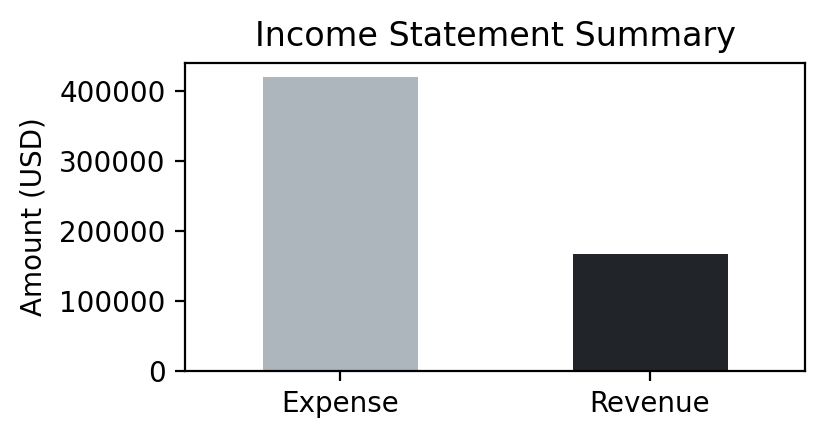

In [456]:
plt.figure(figsize=(4,2), dpi = 200)
summary.plot(kind = 'bar', color = ['#adb5bd', '#212529'], title = 'Income Statement Summary')
plt.ylabel('Amount (USD)')
plt.xlabel('')
plt.xticks(rotation = 0);

### Balance Sheet Breakdown

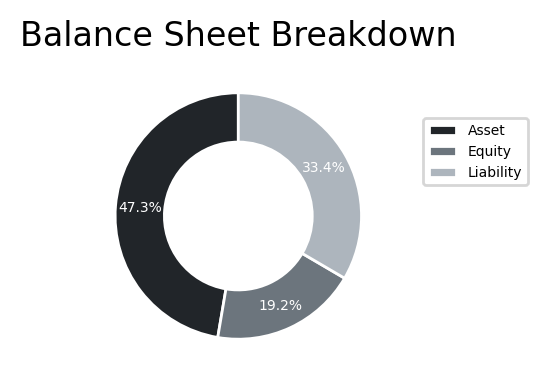

In [458]:
plt.figure(figsize = (2,2), dpi = 200)
balance_summary.plot.pie(
    autopct = '%1.1f%%',
    textprops = {'color' : 'white', 'fontsize' : 5},
    wedgeprops = {'width': 0.4, 'edgecolor': 'white', },
    pctdistance = 0.8,
    colors = ['#212529', '#6c757d', '#adb5bd'],
    labels = balance_summary.index,
    startangle = 90
)
plt.title('Balance Sheet Breakdown', fontsize = 12)
plt.ylabel('')
plt.legend(loc = (1.1, 0.6), fontsize = 5);

### Monthly Revenue Trend

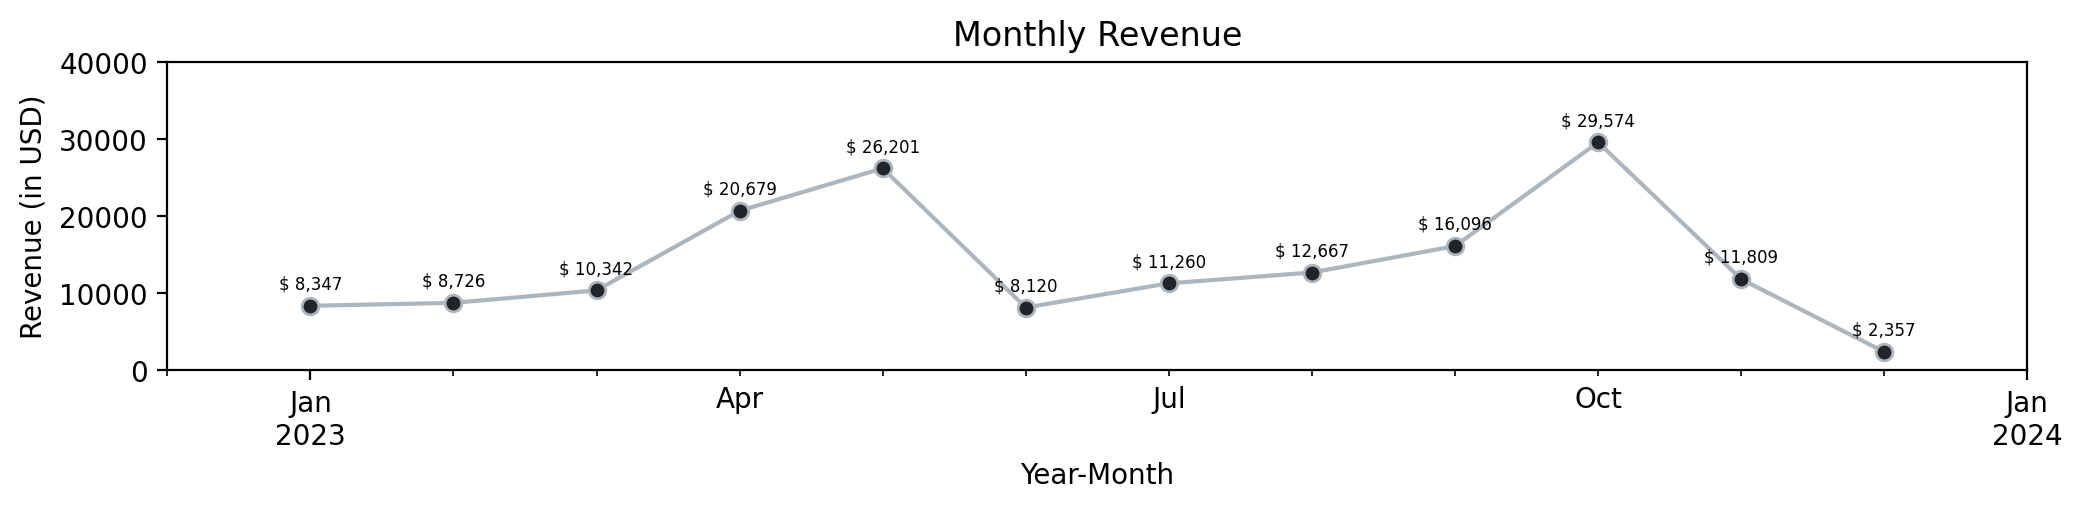

In [574]:
plt.figure(figsize = (12, 2), dpi = 200)

# Group revenue by month
monthly_revenue = income_statement[income_statement['AccountType'] == 'Revenue']
monthly_revenue = monthly_revenue.groupby(monthly_revenue['Date'].dt.to_period('M'))['Amount'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# Plot trend
ax = monthly_revenue.plot(marker = 'o', markerfacecolor = '#212529', color = '#adb5bd')
plt.title('Monthly Revenue')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Revenue (in USD)')

# Format axes
firstdate = monthly_revenue.index.min()
lastdate = monthly_revenue.index.max()
ax.set_xlim(firstdate - pd.DateOffset(days = 5), lastdate + pd.DateOffset(days = 32))
ax.set_ylim(0,40000)

# Adding Data Labels
for x, y in zip(monthly_revenue.index, monthly_revenue.values):
    ax.text(x, y+4000, f"${y: ,.0f}", fontsize = 6, ha = 'center', va = 'top', color = 'black');

### Department-wise expenses

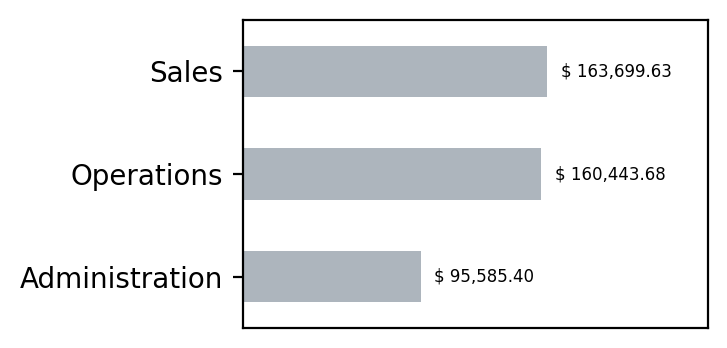

In [576]:
plt.figure(figsize = (3,2), dpi = 200)
dept_expenses = income_statement[income_statement['AccountType'] == 'Expense'].groupby('DepartmentName')['Amount'].sum()
ax = dept_expenses.plot(kind = 'barh', fontsize = 10, color = '#adb5bd')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_xlim(0, 250000)

# Add Bar Labels
for container in ax.containers:
    ax.bar_label(container, fmt = '${: ,.2f}', label_type = 'edge', padding = 5, fontsize = 6)

# Step 8: Creating report

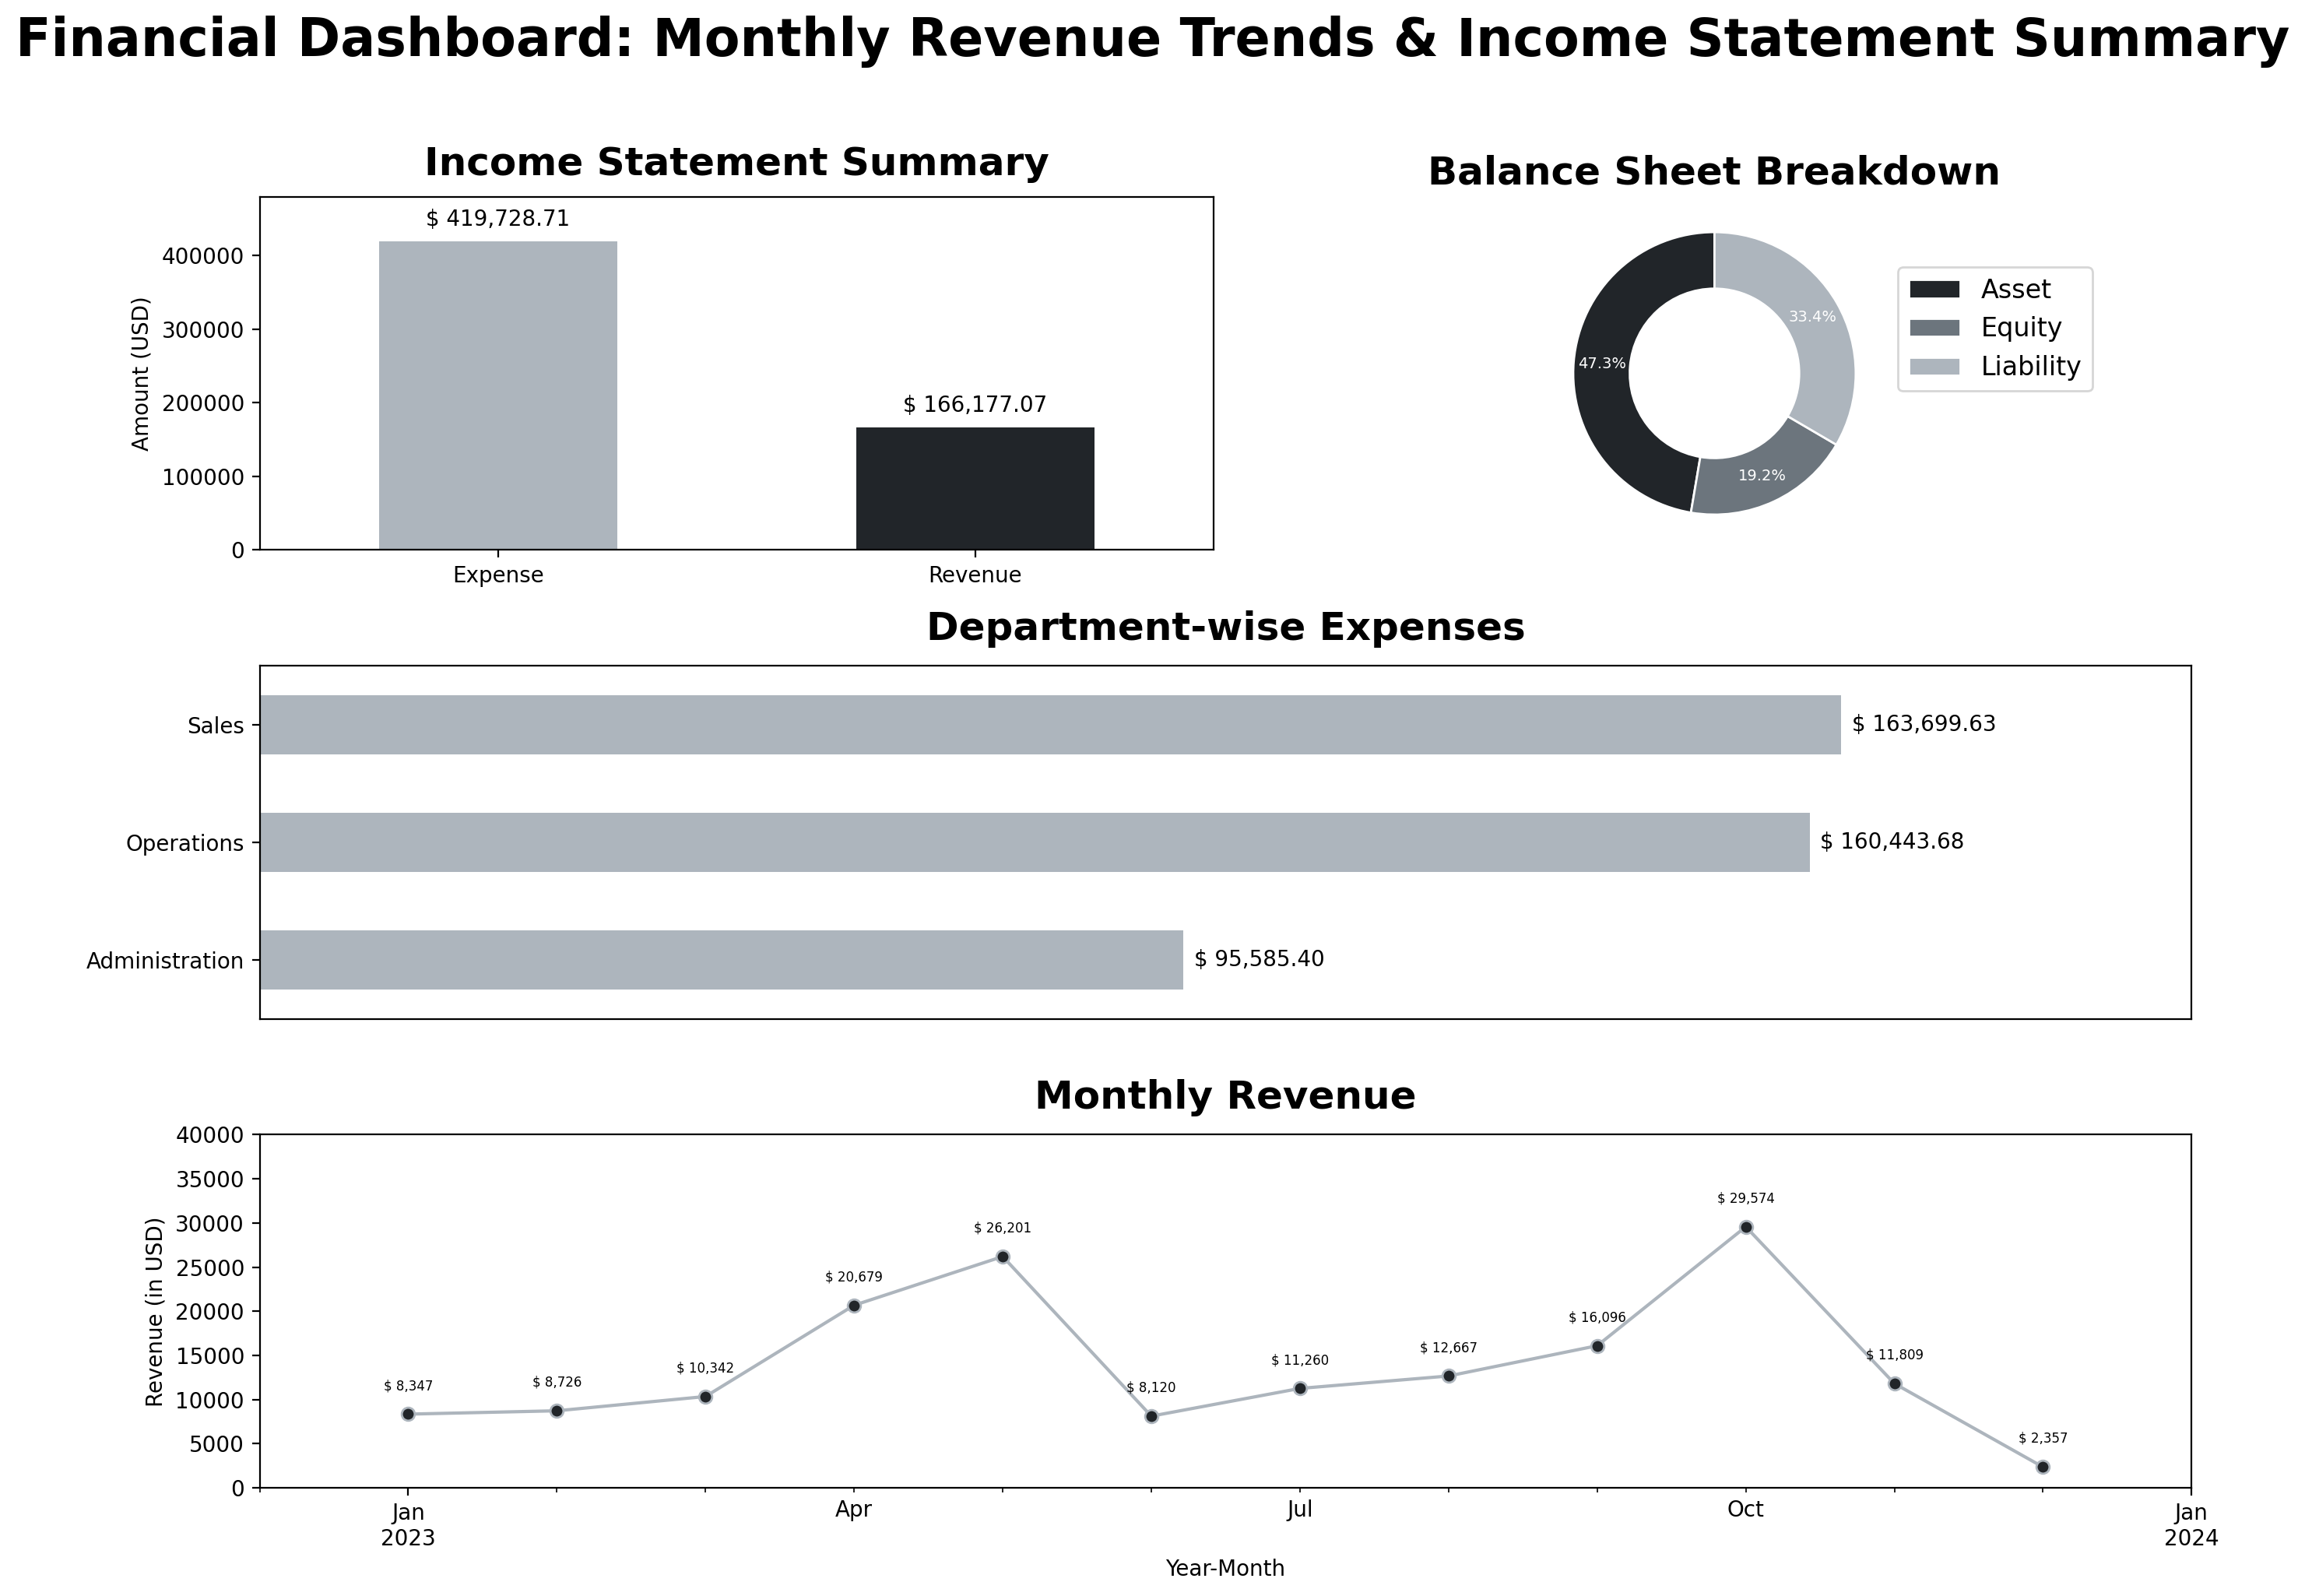

In [532]:
fig = plt.figure(figsize = (14,10), dpi = 200)
gs = gridspec.GridSpec(3, 2)

# Set super title for dashboard
plt.suptitle(
    'Financial Dashboard: Monthly Revenue Trends & Income Statement Summary',
    fontsize=24,
    fontweight='bold',
    y=1.02  # Push title slightly above the plots
)

# Assign subplots to grid
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
ax4 = fig.add_subplot(gs[2, :])


# Income Statement Summary
summary.plot(kind = 'bar', color = ['#adb5bd', '#212529'], ax = ax1)
ax1.set_title('Income Statement Summary', fontsize = 18, fontweight = 'bold', pad = 10)
ax1.set_ylabel('Amount (USD)')
ax1.set_xlabel('')
ax1.tick_params(axis = 'x', labelrotation = 0)
ax1.set_ylim(0,480000)

for container in ax1.containers:
    ax1.bar_label(container, fmt = '${: ,.2f}', label_type = 'edge', padding = 5, fontsize = 10)


# Balance Sheet Breakdown
balance_summary.plot.pie(
    autopct = '%1.1f%%',
    textprops = {'color' : 'white', 'fontsize' : 7},
    wedgeprops = {'width': 0.4, 'edgecolor': 'white', },
    pctdistance = 0.8,
    colors = ['#212529', '#6c757d', '#adb5bd'],
    labels = balance_summary.index,
    startangle = 90,
    ax = ax2
)
ax2.set_title('Balance Sheet Breakdown', fontsize = 18, fontweight = 'bold')
ax2.set_ylabel('')
ax2.legend(loc = (1.02, 0.45), fontsize = 12);


# Department-Wise Expenses
dept_expenses = income_statement[income_statement['AccountType'] == 'Expense'].groupby('DepartmentName')['Amount'].sum()
dept_expenses.plot(kind = 'barh', fontsize = 10, color = '#adb5bd', ax = ax3)
ax3.set_title('Department-wise Expenses', fontsize = 18, fontweight = 'bold', pad = 12)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticks([])
ax3.set_xlim(0, 200000)

# Adding Bar Labels
for container in ax3.containers:
    ax3.bar_label(container, fmt = '${: ,.2f}', label_type = 'edge', padding = 5, fontsize = 10)


# Monthly Revenue Trend
monthly_revenue = income_statement[income_statement['AccountType'] == 'Revenue']
monthly_revenue = monthly_revenue.groupby(monthly_revenue['Date'].dt.to_period('M'))['Amount'].sum()

monthly_revenue.index = monthly_revenue.index.to_timestamp()
monthly_revenue.plot(marker = 'o', markerfacecolor = '#212529', color = '#adb5bd', ax = ax4)

ax4.set_title('Monthly Revenue', fontsize = 18, fontweight = 'bold', pad = 12)
ax4.set_xlabel('Year-Month')
ax4.set_ylabel('Revenue (in USD)')

firstdate = monthly_revenue.index.min()
lastdate = monthly_revenue.index.max()

ax4.set_xlim(firstdate - pd.DateOffset(days = 5), lastdate + pd.DateOffset(days = 32))
ax4.set_ylim(0,40000)


# Adding Data Labels
for x, y in zip(monthly_revenue.index, monthly_revenue.values):
    ax4.text(x, y+4000, f"${y: ,.0f}", fontsize = 6, ha = 'center', va = 'top', color = 'black');


plt.tight_layout()
plt.savefig('financial_dashboard.png');